In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Simple matrix with 2 features and 1 target feature

x_1 = np.array([1,2,3,4,5,6,7,8,9,10])
x_2 = np.array([2,2,3,2,2,9,6,8,8,9])
target = np.array([0,0,0,0,0,1,1,1,1,1])

# Plot data with different colors for different target values

plt.scatter(x_1,x_2,c=target,s=100)  #Here s is the size of the marker



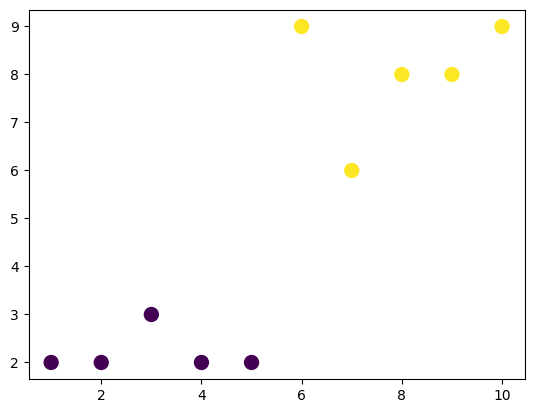

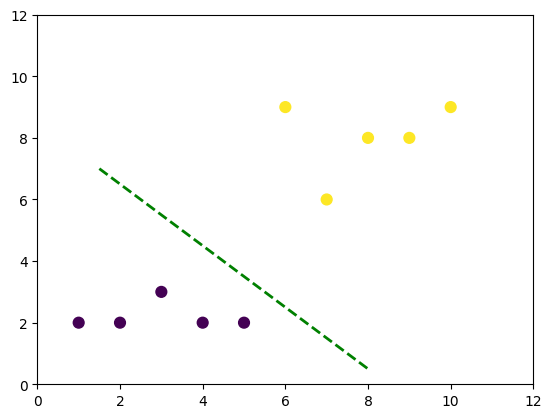

In [2]:
# Draw a boundary that separates the datasets into 2 classes.
# For example, if the decision boundary is given by a line with 2 end points(1.5,7) and (8,0.5)



fig= plt.figure()
ax=fig.add_subplot(111)     #Inorder to have multiple plots in the same figure
plt.scatter(x_1,x_2,c=target,s=60)
plt.plot([1.5,8], [7,0.5], 'g--',lw=2) #g-- indicates  color='green',linestyle='dashed'; the line end points are (1.5,7) and (8,0.5)
ax.set_xlim([0,12])
ax.set_ylim([0,12])
plt.show()

In [3]:
#Creating a data matrix from the arrays x_1,x_2,target


dataset= np.vstack([x_1,x_2,target])  #vertically place the arrays x_1, x_2, target one below the other
print('Vertical stack \n',dataset)

dataset= dataset.T  #Transpose the dataset to get the features and rows properly
print('After transpose \n',dataset)

Vertical stack 
 [[ 1  2  3  4  5  6  7  8  9 10]
 [ 2  2  3  2  2  9  6  8  8  9]
 [ 0  0  0  0  0  1  1  1  1  1]]
After transpose 
 [[ 1  2  0]
 [ 2  2  0]
 [ 3  3  0]
 [ 4  2  0]
 [ 5  2  0]
 [ 6  9  1]
 [ 7  6  1]
 [ 8  8  1]
 [ 9  8  1]
 [10  9  1]]


In [4]:
#Separate the target feature 

X= dataset[:,0:2]   #features
Y= dataset[:,2]     #target feature



In [5]:
#Apply SVM algo on X dataset to get appropriate model

from sklearn import svm
clf = svm.SVC(kernel='linear', C = 0.5, gamma = 0.1) #clf is the model ; C is regularization parameter; Linear kernel used for linearly separable dataset;
# As values of C parameter increases, misclassification will be less . Thus it leads to overfitting as the margin becomes more harder/smaller
# High values of gamma leads to overfitting as it correctly identifies the support vectors and accordingly a harder margin. Its related to Gaussian kernel

clf.fit(X,Y)    #Fit the model

print(clf.intercept_, clf.coef_)  #the theta parameters t0 given by intercept_ , the remaining parameters t1,t2 given by array coef_ . 

theta_0=clf.intercept_
theta = clf.coef_


# Add theta0 with theta array to form a single vector
thetas = np.insert(theta[0],0,theta_0)    #theta_0 added at the front of the array. Index 0

print('thetas ',thetas)



[-2.8] [[0.2 0.4]]
thetas  [-2.8  0.2  0.4]


In [6]:
#Drawing decision boundary
# Refer equation at https://medium.com/geekculture/svm-classification-with-sklearn-svm-svc-how-to-plot-a-decision-boundary-with-margins-in-2d-space-7232cb3962c0 for decision boundary equation


p1 = np.linspace(0, 10)    # generating points for x-axis
p2 = -(thetas[1] / thetas[2]) * p1 - thetas[0] / thetas[2]  # getting corresponding points for y-axis



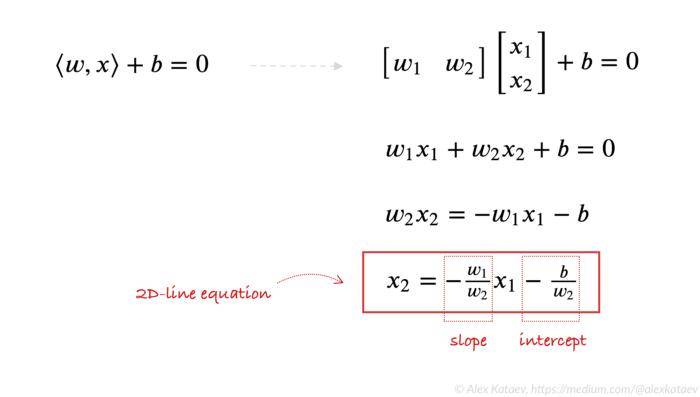

In [7]:
lbl=clf.predict([[8,4]])           #predict the label/target for the test sample(8,9) using equation y=-2.8 + 0.2x_1 + 0.4x_2
print(lbl)

lbl1=clf.predict([[6,0.5]])           #predict the label/target for the test sample(6,0.5)
print(lbl1)

[1]
[0]


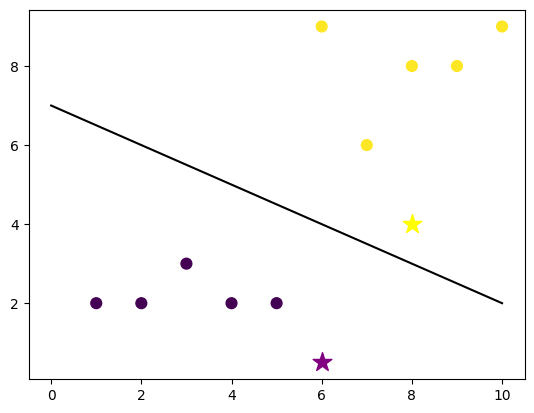

In [8]:
#show the label of the test sample in the plot together with the decision boundary and the training samples

fig= plt.figure()
ax=fig.add_subplot(111)     #Inorder to have multiple plots in the same figure
plt.scatter(x_1,x_2,c=target,s=60)
plt.scatter(8,4,c='yellow',marker='*',s=200)  #test data sample
plt.scatter(6,0.5,c='purple', marker='*',s=200) #test data sample
# plt.plot([1.5,8], [7,0.5], 'g--',lw=2) #g-- indicates  color='green',linestyle='dashed'; the line end points are (1.5,7) and (8,0.5)
plt.plot(p1,p2, c='black')


plt.show()

thetas  [-0.19968442  0.00863418  0.49620775]


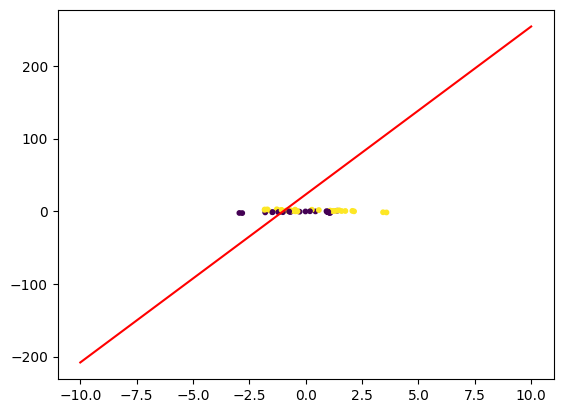

In [12]:
# SVM on random dataset with m samples and d features 

import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_classification    #to generate dataset for classification
from sklearn.model_selection  import train_test_split #to split dataset into training and testing

# Creating a random dataset of m=2,000 samples and d=2 features
# (for 2–dimensional space). And yeah, it's a binary classification
# here (`y` contains two classes: 0 and 1).
X, y = make_classification(n_samples=100, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_classes=2,
                           random_state=32)
# Splitting our dataset by train and test parts.
# `stratify` is here to make our splitting balanced
# in terms of classes.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   test_size=0.3, stratify=y,
                                   random_state=32)

# And here we train our model. IMPORTANT: we use kernel='linear'.
clf = SVC(kernel='linear', C=0.01)
clf.fit(X_train, y_train)

#theta parameters
theta_0=clf.intercept_
theta = clf.coef_


# Add theta0 with theta array to form a single vector
thetas = np.insert(theta[0],0,theta_0)    #theta_0 added at the front of the array. Index 0

print('thetas ',thetas)


#Form points to draw Decision boundary 

p1 = np.linspace(-10, 10)    # generating points for X-axis
p2 = -(thetas[0] / thetas[1]) * p1 - thetas[0] / thetas[1]  # getting corresponding Y-axis points

#Plot data and decision boundary

x_1 =  X_train[:,0]
x_2 = X_train[:,1]
target= y_train

fig= plt.figure()
ax=fig.add_subplot(111)     #Inorder to have multiple plots in the same figure
plt.scatter(x_1,x_2,c=target,s=10)

# Plotting a red hyperplane
plt.plot(p1,p2, c='r');

# ax.set_xlim([xmin,xmax])
# ax.set_ylim([x_2min,x_2max])

plt.show()


In [72]:
#SVM on available dataset IRIS in sklearn package

from sklearn import datasets
from sklearn import metrics
from sklearn.svm import SVC

# load the iris datasets
dataset = datasets.load_iris()
# fit a SVM model to the data
model = SVC()
model.fit(dataset.data, dataset.target)
print(model)
# make predictions
expected = dataset.target
predicted = model.predict(dataset.data)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))


SVC()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]
